## Importing Libraries

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import numpy as np

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

plt.style.use("seaborn-v0_8-talk")

## Formatting the plot

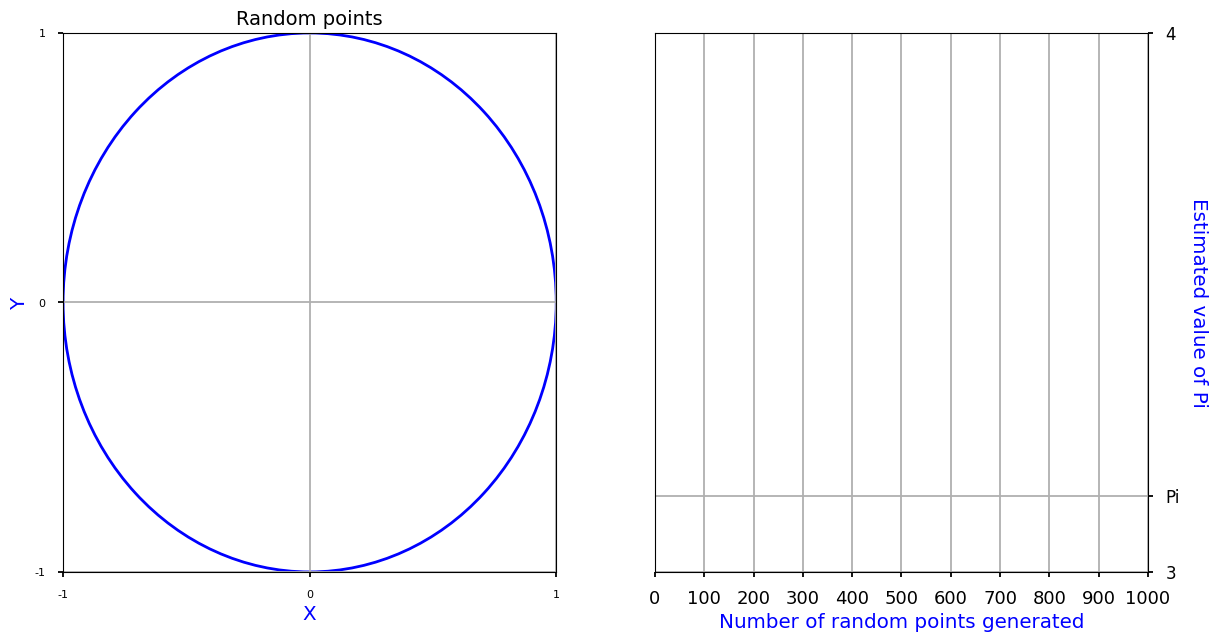

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

N = 1000

xdata, ydata, n, pi =[], [], [], []

scatter0 = ax[0].scatter(xdata, ydata, s=20, c=n, cmap="Reds")
scatter1 = ax[1].scatter(n, pi, s=20, c=n, cmap="Reds")

ax[0].set_title("Random points", fontsize=14)

ax[0].set_xlim(-1,1)
ax[0].set_xlabel("X", c="blue")
ax[0].set_xticks([-1,0,1], [-1,0,1], fontsize=8)

ax[0].set_ylim(-1,1)
ax[0].set_ylabel("Y", c="blue")
ax[0].set_yticks([-1,0,1], [-1,0,1], fontsize=8)

ax[0].grid(True)
ax[0].add_patch(mpatches.Circle((0, 0), 1, color="blue", lw=2, fill=False))

ax[1].set_xlim(0, N)
ax[1].set_xlabel("Number of random points generated", c="blue")
ax[1].set_xticks(list(range(0, N+100, 100)))

ax[1].set_ylim(3, 4)
ax[1].set_ylabel("Estimated value of Pi", c="blue", rotation=-90, labelpad=20)
ax[1].set_yticks([3,3.1416,4], [3,"Pi",4], fontsize=12)

ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

ax[1].grid(True)


## Running the montecarlo and animation loop

In [15]:
numerator=0
denominator=0

random.seed(a=3)
def animate(i):
    global xdata, ydata, n, pi, numerator, denominator, N
    xdata.append(random.uniform(-1.0, 1.0))
    ydata.append(random.uniform(-1.0, 1.0))
    n.append(i)
    
    if (xdata[i]**2 + ydata[i]**2) > 1:
        denominator += 1
    else:
        numerator += 1
        denominator += 1
    pi.append(4*numerator/denominator)

    scatter0.set_offsets(np.column_stack((xdata, ydata)))
    scatter0.set_array(n)
    scatter0.set_clim(0, i)
    scatter1.set_offsets(np.column_stack((n, pi)))
    scatter1.set_array(n)
    scatter1.set_clim(0, i)

    ax[1].set_title(f"Estimated Pi = {pi[i]:.6f}", fontsize=20)


ani= animation.FuncAnimation(fig, animate, frames=N)

ani.save("ani.gif", writer="pillow", fps=60, dpi=50)

plt.show()